In [ ]:
!pip3 install pandas-ta
!pip3 install mplfinance
!pip3 install yfinance

import pandas_ta as ta
import yfinance as yf
import mplfinance as mpf

In [65]:
# [open_10,....,open, high_10,....,high,low_10,....low, close_10,....close,volume_10,.....volume,'bearish'] bearish if next close is decreasing
# [open_10,....,open, high_10,....,high,low_10,....low, close_10,....close,volume_10,.....volume,'bullish'] bullish if next close is increasing
# df.shift
import requests
from pandas import json_normalize
import numpy as np
import time
from datetime import date,datetime
import matplotlib.pyplot as plt
import pandas as pd


# get historical market data
df = yf.download('SBIN.NS', period='10d', interval = '30m')
df.columns = ['open','high','low','close','adj_close','volume']
df = df[['open','high','low','close','adj_close','volume']]
df.reset_index(inplace=True)
df['Date']=df['Datetime'].copy()
df

[*********************100%***********************]  1 of 1 completed


,Datetime,open,high,low,close,adj_close,volume,Date
0,2022-04-18 09:00:00+05:30,512.500000,514.950012,510.700012,512.299988,512.299988,987989,2022-04-18 09:00:00+05:30
1,2022-04-18 09:30:00+05:30,512.299988,514.400024,510.649994,512.099976,512.099976,1774896,2022-04-18 09:30:00+05:30
2,2022-04-18 10:00:00+05:30,512.000000,512.000000,508.299988,508.950012,508.950012,1561094,2022-04-18 10:00:00+05:30
3,2022-04-18 10:30:00+05:30,509.000000,509.750000,508.000000,508.200012,508.200012,947408,2022-04-18 10:30:00+05:30
4,2022-04-18 11:00:00+05:30,508.149994,509.549988,507.700012,509.149994,509.149994,757710,2022-04-18 11:00:00+05:30
...,...,...,...,...,...,...,...,...
126,2022-04-29 13:30:00+05:30,505.450012,505.600006,502.700012,503.850006,503.850006,619231,2022-04-29 13:30:00+05:30
127,2022-04-29 14:00:00+05:30,503.750000,504.000000,501.299988,502.899994,502.899994,747199,2022-04-29 14:00:00+05:30
128,2022-04-29 14:30:00+05:30,502.700012,503.399994,501.350006,502.299988,502.299988,564032,2022-04-29 14:30:00+05:30
129,2022-04-29 15:00:00+05:30,502.450012,502.450012,494.000000,495.850006,495.850006,3780147,2022-04-29 15:00:00+05:30


count    131.000000
mean     505.758014
std        7.080411
min      492.750000
25%      499.375000
50%      505.850006
75%      510.875000
max      520.000000
Name: close, dtype: float64


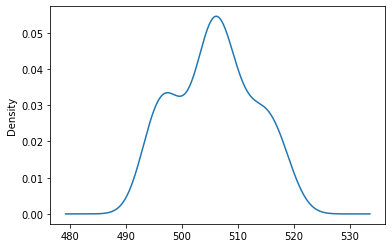

In [ ]:
print(df.close.describe())
df.close.plot.kde()

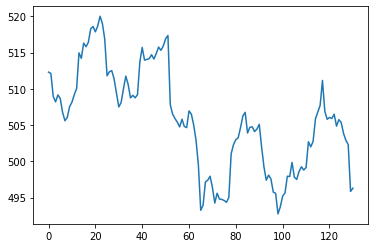

In [66]:
df.close.plot()

In [67]:
df

,Datetime,open,high,low,close,adj_close,volume,Date
0,2022-04-18 09:00:00+05:30,512.500000,514.950012,510.700012,512.299988,512.299988,987989,2022-04-18 09:00:00+05:30
1,2022-04-18 09:30:00+05:30,512.299988,514.400024,510.649994,512.099976,512.099976,1774896,2022-04-18 09:30:00+05:30
2,2022-04-18 10:00:00+05:30,512.000000,512.000000,508.299988,508.950012,508.950012,1561094,2022-04-18 10:00:00+05:30
3,2022-04-18 10:30:00+05:30,509.000000,509.750000,508.000000,508.200012,508.200012,947408,2022-04-18 10:30:00+05:30
4,2022-04-18 11:00:00+05:30,508.149994,509.549988,507.700012,509.149994,509.149994,757710,2022-04-18 11:00:00+05:30
...,...,...,...,...,...,...,...,...
126,2022-04-29 13:30:00+05:30,505.450012,505.600006,502.700012,503.850006,503.850006,619231,2022-04-29 13:30:00+05:30
127,2022-04-29 14:00:00+05:30,503.750000,504.000000,501.299988,502.899994,502.899994,747199,2022-04-29 14:00:00+05:30
128,2022-04-29 14:30:00+05:30,502.700012,503.399994,501.350006,502.299988,502.299988,564032,2022-04-29 14:30:00+05:30
129,2022-04-29 15:00:00+05:30,502.450012,502.450012,494.000000,495.850006,495.850006,3780147,2022-04-29 15:00:00+05:30


KeyError: ignored

In [68]:
#shifting only 'close' row value by value 514 

df['dayofweek'] = df['Date'].dt.dayofweek
df['quarter'] = df['Date'].dt.quarter
df['month'] = df['Date'].dt.month
df['monthofquarter'] = df['month']%4
df['dayofyear'] = df['Date'].dt.dayofyear
df['dayofmonth'] = df['Date'].dt.day
df['weekofyear'] = df['Date'].dt.weekofyear
df['year'] = df['Date'].dt.year
df['target'] = np.nan
for i in range(df.shape[0]):
  df['target'] = df.apply(lambda row: 1 if (row['close'] > row['close_3']) else 0, axis=1)
df.dropna(inplace=True)
df.drop('Date', axis=1, inplace=True)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


KeyError: ignored

In [ ]:
df.target.unique()

array([1, 0])

Normalization

In [ ]:
# transform data
cols = list(df.columns)
unwanted = ['close','open','low','high','volume', 'adj_close','target']
cols = [ele for ele in cols if ele not in unwanted]
x = df[cols]
y = df['target']
train_size = 0.9
print(int(train_size*x.shape[0]))

x_train, x_test = x[:int(train_size*x.shape[0])], x[int(train_size*x.shape[0]):]
y_train, y_test = y[:int(train_size*y.shape[0])], y[int(train_size*y.shape[0]):]

108


In [ ]:
x_train.shape, x_test.shape,  y_test.shape, y_train.shape

((108, 48), (13, 48), (13,), (108,))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re

from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train_scaled

array([[0.47155986, 0.50919117, 0.48368512, ..., 0.        , 0.        ,
        0.        ],
       [0.48807295, 0.46874979, 0.45681326, ..., 0.        , 0.        ,
        0.        ],
       [0.54311882, 0.48896992, 0.50287896, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33944954, 0.36213241, 0.32245635, ..., 0.90909091, 1.        ,
        0.        ],
       [0.36697248, 0.34007338, 0.30902043, ..., 0.90909091, 1.        ,
        0.        ],
       [0.48073417, 0.36764689, 0.4280225 , ..., 1.        , 1.        ,
        0.        ]])

# **KNN**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train_scaled,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:92.31%


In [ ]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test,knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.50      0.67         2

    accuracy                           0.92        13
   macro avg       0.96      0.75      0.81        13
weighted avg       0.93      0.92      0.91        13



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


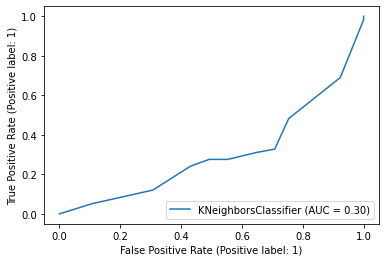

In [ ]:
metrics.plot_roc_curve(knn, x_test, y_test) 
plt.show()

# **SVM**

In [ ]:
svm=SVC()
svm.fit(x_train_scaled,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))

SVM Accuracy:39.02%


In [ ]:
print(metrics.classification_report(y_test,svm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.43      0.51      0.47        65
           1       0.32      0.26      0.29        58

    accuracy                           0.39       123
   macro avg       0.38      0.38      0.38       123
weighted avg       0.38      0.39      0.38       123



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


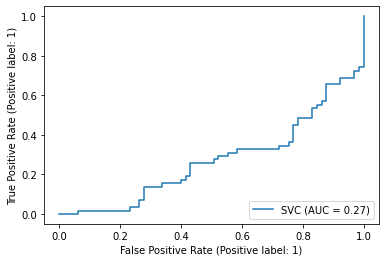

In [ ]:
metrics.plot_roc_curve(svm, x_test, y_test) 
plt.show()

# **GBC**

In [ ]:
gbc=GradientBoostingClassifier(subsample=1,n_estimators=100,max_depth=3,max_leaf_nodes=25)
gbc.fit(x_train_scaled,y_train)
print("Gradient Boosting Accuracy:{:.2f}%".format(gbc.score(x_test,y_test)*100))

Gradient Boosting Accuracy:41.46%


In [ ]:
print(metrics.classification_report(y_test,gbc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.11      0.02      0.03        65
           1       0.44      0.86      0.58        58

    accuracy                           0.41       123
   macro avg       0.27      0.44      0.30       123
weighted avg       0.27      0.41      0.29       123



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


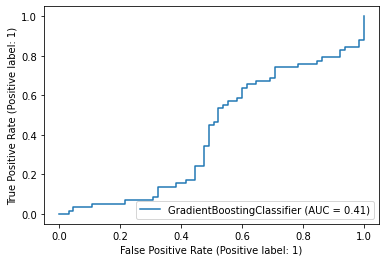

In [ ]:
metrics.plot_roc_curve(gbc, x_test, y_test) 
plt.show()

# **XGB**

In [ ]:
xgb=XGBClassifier(learning_rate = 0.01, max_depth = 10, n_estimators = 100)
xgb.fit(x_train_scaled,y_train)
xgb_predict = xgb.predict(x_test)
print("XGB Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))

XGB Accuracy:69.23%


In [ ]:
print(metrics.classification_report(y_test,xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.49      0.72      0.59        65
           1       0.36      0.17      0.23        58

    accuracy                           0.46       123
   macro avg       0.43      0.45      0.41       123
weighted avg       0.43      0.46      0.42       123



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


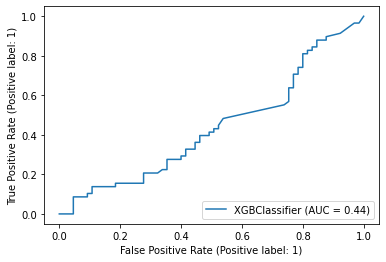

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
metrics.plot_roc_curve(xgb, x_test, y_test) 

plt.show()

In [ ]:
# fit whole data using xgb
XGB_model = XGBClassifier(learning_rate = 0.01, max_depth = 7, n_estimators = 400)
XGB_model.fit(x_train_scaled, y_train)
y_XGB_predict = XGB_model.predict(x_test)
print("XGB Accuracy:{:.2f}%".format(XGB_model.score(x_test,y_test)*100))

XGB Accuracy:39.84%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


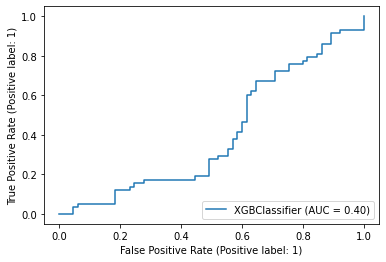

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
metrics.plot_roc_curve(XGB_model, x_test, y_test) 

plt.show()

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train_scaled,y_train)
y_pred=clf.predict(x_test)
print("Random Forest:{:.2f}%".format(clf.score(x_test,y_test)*100))

Random Forest:47.15%


In [ ]:
print(metrics.classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.47      1.00      0.64        58

    accuracy                           0.47       123
   macro avg       0.24      0.50      0.32       123
weighted avg       0.22      0.47      0.30       123



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# fit whole data using random forest 
rand_forest_regressor = RandomForestClassifier(max_depth = 60, n_estimators= 1500)
rand_forest_regressor.fit(x_train_scaled, y_train)
y_rand_forest_predict = rand_forest_regressor.predict(x_test)
print("Random Forest:{:.2f}%".format(rand_forest_regressor.score(x_test,y_test)*100))

Random Forest:47.15%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


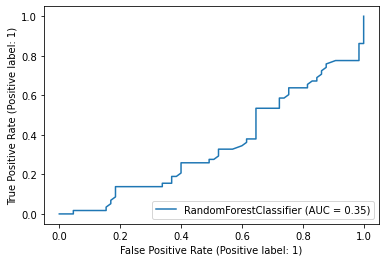

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
metrics.plot_roc_curve(rand_forest_regressor, x_test, y_test) 

plt.show()

## **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train_scaled,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
print("Decision Trees:{:.2f}%".format(clf.score(x_test,y_test)*100))


Decision Trees:54.47%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


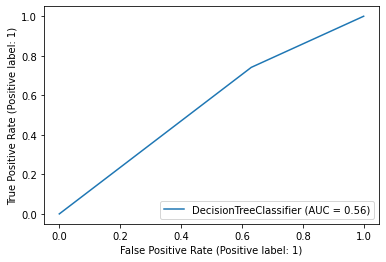

In [ ]:
metrics.plot_roc_curve(clf, x_test, y_test) 

plt.show()


# **LGBM**

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.013,max_depth=-1,random_state=42)
model.fit(x_train_scaled,y_train,eval_set=[(x_test,y_test),(x_train_scaled,y_train)],
          verbose=20,eval_metric='logloss')

print('Training accuracy {:.4f}'.format(model.score(x_train_scaled,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

[20]	training's binary_logloss: 0.628116	training's binary_logloss: 0.628116	valid_0's binary_logloss: 0.718356	valid_0's binary_logloss: 0.718356
[40]	training's binary_logloss: 0.579612	training's binary_logloss: 0.579612	valid_0's binary_logloss: 0.749814	valid_0's binary_logloss: 0.749814
[60]	training's binary_logloss: 0.537989	training's binary_logloss: 0.537989	valid_0's binary_logloss: 0.782473	valid_0's binary_logloss: 0.782473
[80]	training's binary_logloss: 0.500758	training's binary_logloss: 0.500758	valid_0's binary_logloss: 0.813588	valid_0's binary_logloss: 0.813588
[100]	training's binary_logloss: 0.466078	training's binary_logloss: 0.466078	valid_0's binary_logloss: 0.837078	valid_0's binary_logloss: 0.837078
Training accuracy 0.9248
Testing accuracy 0.3984


In [ ]:
print('Training accuracy {:.4f}'.format(model.score(x_train_scaled,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.9248
Testing accuracy 0.3984


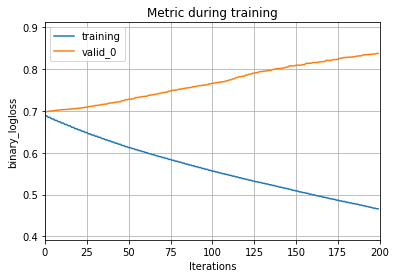

In [ ]:
lgb.plot_metric(model)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


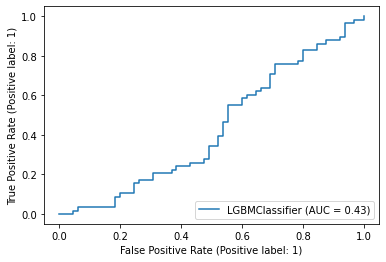

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
metrics.plot_roc_curve(model, x_test, y_test) 

plt.show()

## **Deep Learning Model**

In [ ]:
df["target"].unique()

array([1, 0])

In [ ]:
data=df.values
data

array([[3.00000000e+02, 3.02600006e+02, 2.96000000e+02, ...,
        1.90000000e+01, 2.01700000e+03, 1.00000000e+00],
       [2.98399994e+02, 3.02000000e+02, 2.97500000e+02, ...,
        2.00000000e+01, 2.01700000e+03, 1.00000000e+00],
       [3.02000000e+02, 3.08399994e+02, 2.99350006e+02, ...,
        2.00000000e+01, 2.01700000e+03, 1.00000000e+00],
       ...,
       [4.95000000e+02, 4.99200012e+02, 4.90049988e+02, ...,
        1.70000000e+01, 2.02200000e+03, 0.00000000e+00],
       [4.99000000e+02, 5.07899994e+02, 4.98450012e+02, ...,
        1.70000000e+01, 2.02200000e+03, 0.00000000e+00],
       [5.00000000e+02, 5.02799988e+02, 4.91850006e+02, ...,
        1.70000000e+01, 2.02200000e+03, 0.00000000e+00]])

In [ ]:
# keras model
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# create training and test datasets

from sklearn.model_selection import train_test_split

x_train_scaled, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# inspect first 10 values for each dataset

print(x_train[:], '\n')
print(x_test[:], '\n')
print(y_train[:], '\n')
print(y_test[:], '\n')

         close_3      open_3      high_3       low_3    volume_3     close_4  \
10    296.500000  300.899994  300.899994  295.250000   7843574.0  299.399994   
11    294.450012  297.000000  298.149994  293.000000   8699405.0  296.500000   
12    298.100006  295.899994  299.399994  294.450012  11934889.0  294.450012   
13    297.899994  300.000000  302.600006  296.000000  13376269.0  298.100006   
14    301.399994  298.399994  302.000000  297.500000  10383539.0  297.899994   
...          ...         ...         ...         ...         ...         ...   
1108  497.950012  494.000000  501.000000  491.700012  20084248.0  490.600006   
1109  488.200012  500.350006  504.200012  483.250000  20645100.0  497.950012   
1110  499.899994  488.799988  507.500000  483.100006  34080545.0  488.200012   
1111  502.950012  504.899994  506.500000  491.750000  20808243.0  499.899994   
1112  502.950012  504.600006  508.700012  500.000000  24080485.0  502.950012   

          open_4      high_4       low_

In [ ]:
tf.random.set_seed(42)


# CREATE MODEL

model_1 = keras.Sequential([keras.layers.Dense(10, activation='relu'),keras.layers.Dense(1, activation='sigmoid')], name='model_1')


# COMPILE MODEL

model_1.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(),metrics='accuracy')


# CREATE LEARNING RATE CALL BACK

lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# FIT MODEL

m1 = model_1.fit(x_train_scaled, y_train,verbose=2,epochs=60,validation_data=(x_test,y_test),callbacks=lr_scheduler,)

Epoch 1/60
31/31 - 1s - loss: 2651138.0000 - accuracy: 0.5122 - val_loss: 2199562.7500 - val_accuracy: 0.5000 - lr: 1.0000e-04 - 1s/epoch - 39ms/step
Epoch 2/60
31/31 - 0s - loss: 2163642.7500 - accuracy: 0.5041 - val_loss: 1835671.3750 - val_accuracy: 0.5244 - lr: 1.1220e-04 - 120ms/epoch - 4ms/step
Epoch 3/60
31/31 - 0s - loss: 1886597.6250 - accuracy: 0.5255 - val_loss: 1648659.6250 - val_accuracy: 0.5203 - lr: 1.2589e-04 - 243ms/epoch - 8ms/step
Epoch 4/60
31/31 - 0s - loss: 1754038.8750 - accuracy: 0.5102 - val_loss: 1557557.1250 - val_accuracy: 0.5041 - lr: 1.4125e-04 - 196ms/epoch - 6ms/step
Epoch 5/60
31/31 - 0s - loss: 1644337.2500 - accuracy: 0.5082 - val_loss: 1452974.5000 - val_accuracy: 0.5163 - lr: 1.5849e-04 - 233ms/epoch - 8ms/step
Epoch 6/60
31/31 - 0s - loss: 1525916.1250 - accuracy: 0.5092 - val_loss: 1343413.2500 - val_accuracy: 0.5081 - lr: 1.7783e-04 - 125ms/epoch - 4ms/step
Epoch 7/60
31/31 - 0s - loss: 1398686.2500 - accuracy: 0.5102 - val_loss: 1220231.2500 - v

Text(0.5, 1.0, 'learning rate decay curve')

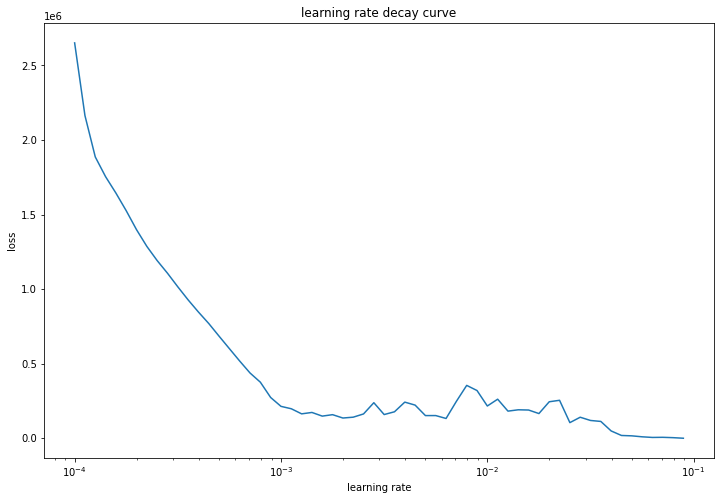

In [ ]:
# plot out the learning rate decay curve

# get LR scheduler

lrs = 1e-4 * 10**(np.arange(60) / 20) # can also use tf.range(60), where 60 == epochs

# get loss

loss = m1.history['loss']

# plot learning rate decay curve with LR and loss

plt.figure(figsize=(12,8))
plt.semilogx(lrs, loss)
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learning rate decay curve')

<Figure size 720x720 with 0 Axes>

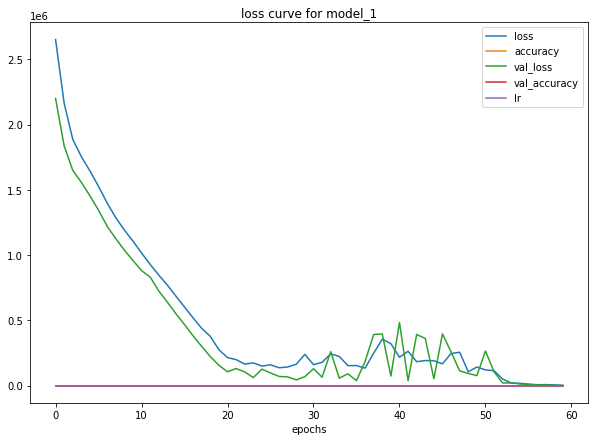

In [ ]:
plt.figure(figsize=(10,10))
pd.DataFrame(m1.history).plot(figsize=(10,7), title='loss curve for model_1', xlabel='epochs')

In [ ]:
model_1.evaluate(x_test, y_test)
# accuracy is 100%

8/8 [==============================] - 0s 4ms/step - loss: 1621.5676 - accuracy: 0.4715


[1621.567626953125, 0.47154471278190613]

In [ ]:
# keras model
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
tf.random.set_seed(42)

In [ ]:
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [ ]:
optimizer = tf.keras.optimizers.SGD()
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

model_1.fit(x_train_scaled, y_train, epochs = 5)

Epoch 1/5
31/31 [==============================] - 1s 2ms/step - loss: 8.1523 - accuracy: 0.4714
Epoch 2/5
31/31 [==============================] - 0s 2ms/step - loss: 8.1523 - accuracy: 0.4714
Epoch 3/5
31/31 [==============================] - 0s 2ms/step - loss: 8.1523 - accuracy: 0.4714
Epoch 4/5
31/31 [==============================] - 0s 2ms/step - loss: 8.1523 - accuracy: 0.4714
Epoch 5/5
31/31 [==============================] - 0s 2ms/step - loss: 8.1523 - accuracy: 0.4714


In [ ]:
model_1.fit(x_train_scaled, y_train, epochs = 200, verbose = 0) 
#we set verbose = 0 to remove training procedure )
model_1.evaluate(x_train_scaled, y_train)

31/31 [==============================] - 0s 1ms/step - loss: 8.1523 - accuracy: 0.4714


[8.152291297912598, 0.4714285731315613]

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_2 = tf.keras.Sequential([ tf.keras.layers.Dense(1), tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),optimizer = tf.keras.optimizers.SGD(),metrics = ['accuracy'])

model_2.fit(x_train_scaled, y_train, epochs = 100, verbose = 0)

In [ ]:
model_2.evaluate(x_train_scaled, y_train)

31/31 [==============================] - 0s 1ms/step - loss: 8.1523 - accuracy: 0.4714


[8.152291297912598, 0.4714285731315613]

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_3 = tf.keras.Sequential([

  tf.keras.layers.Dense(100), # add 100 dense neurons

  tf.keras.layers.Dense(10),

  tf.keras.layers.Dense(1)

])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),

                optimizer=tf.keras.optimizers.Adam(), 

                metrics=['accuracy'])

model_3.fit(x_train_scaled, y_train, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(x_train_scaled, y_train)


31/31 [==============================] - 0s 1ms/step - loss: 7.6472 - accuracy: 0.5000


[7.647209644317627, 0.5]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_train_scaled, y_train = x[:1000], y[:1000]
x_test, y_test = x[1000:], y[1000:]
x_train_scaled.shape, x_test.shape

((1000, 48), (226, 48))

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_4 = tf.keras.Sequential([

                               tf.keras.layers.Dense(4, activation = 'relu'), #we may right it "tf.keras.activations.relu" too

                               tf.keras.layers.Dense(4, activation = 'relu'),

                               tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model_4.compile( loss= tf.keras.losses.binary_crossentropy,

                optimizer = tf.keras.optimizers.Adam(lr = 0.01),

                metrics = ['accuracy'])

history= model_4.fit(x_train_scaled, y_train, epochs = 25, verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
loss, accuracy = model_4.evaluate(x_test, y_test)
print(f' Model loss on the test set: {loss}')
print(f' Model accuracy on the test set: {100*accuracy}')

8/8 [==============================] - 0s 2ms/step - loss: 252.8581 - accuracy: 0.5354
 Model loss on the test set: 252.8581085205078
 Model accuracy on the test set: 53.53982448577881


In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,2.463159e+06,0.504
1,3.733006e+04,0.502
2,4.821641e+04,0.499
3,4.867600e+04,0.486
4,2.494095e+04,0.492
5,3.042275e+04,0.460
6,4.022294e+04,0.481
7,2.095037e+04,0.502
8,1.273036e+04,0.494
9,1.540593e+04,0.488


Text(0.5, 1.0, 'Model_4 training curves')

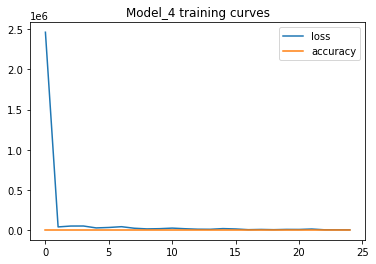

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_4 training curves")

In [ ]:

tf.random.set_seed(42)


model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_4.fit(x_train_scaled, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 17323414.0000 - accuracy: 0.4850 - lr: 1.0000e-04
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 16452578.0000 - accuracy: 0.4850 - lr: 1.1220e-04
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 15464593.0000 - accuracy: 0.4850 - lr: 1.2589e-04
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 14403458.0000 - accuracy: 0.4850 - lr: 1.4125e-04
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 13209366.0000 - accuracy: 0.4850 - lr: 1.5849e-04
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 11898094.0000 - accuracy: 0.4840 - lr: 1.7783e-04
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 10392598.0000 - accuracy: 0.4840 - lr: 1.9953e-04
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 8646986.0000 - accuracy: 0.4880 - lr: 2.2387e-04
Epoch 9/100
32/32

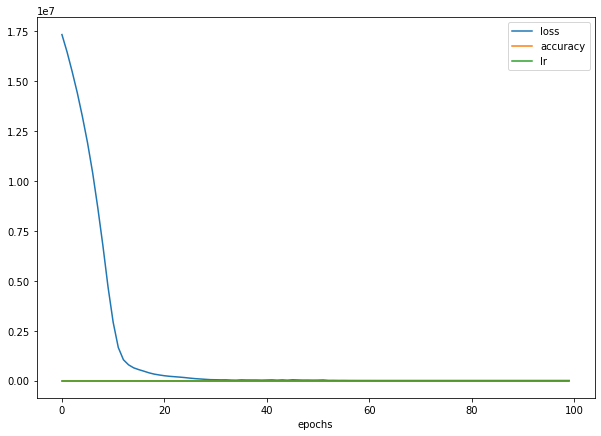

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

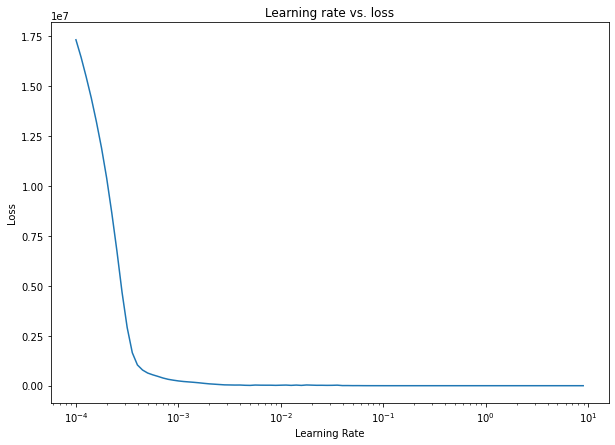

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(x_train_scaled, y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 1ms/step - loss: 1390561.3750 - accuracy: 0.4830
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 70588.5547 - accuracy: 0.4870
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 28590.0625 - accuracy: 0.5170
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 41087.7656 - accuracy: 0.4870
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 12389.1299 - accuracy: 0.4900
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 12066.2412 - accuracy: 0.4950
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 19358.0234 - accuracy: 0.4970
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 8182.0146 - accuracy: 0.4990
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 763.8158 - accuracy: 0.5120
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 683.7903 - accuracy: 

In [ ]:
# Evaluate model on the test dataset
model_10.evaluate(x_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 23.8246 - accuracy: 0.5354


[23.824560165405273, 0.5353982448577881]

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 23.8246 - accuracy: 0.5354
Model loss on test set: 23.824560165405273
Model accuracy on test set: 53.54%


In [ ]:
y_test, y_test

(1010    1
 1011    1
 1012    1
 1013    1
 1014    0
        ..
 1231    1
 1232    0
 1233    0
 1234    0
 1235    0
 Name: target, Length: 226, dtype: int64, 1010    1
 1011    1
 1012    1
 1013    1
 1014    0
        ..
 1231    1
 1232    0
 1233    0
 1234    0
 1235    0
 Name: target, Length: 226, dtype: int64)

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

print(metrics.classification_report(model_10.predict(x_test,y_test)))

ValueError: ignored

In [ ]:
confusion_matrix(y_test, tf.round(y_preds))

NameError: ignored

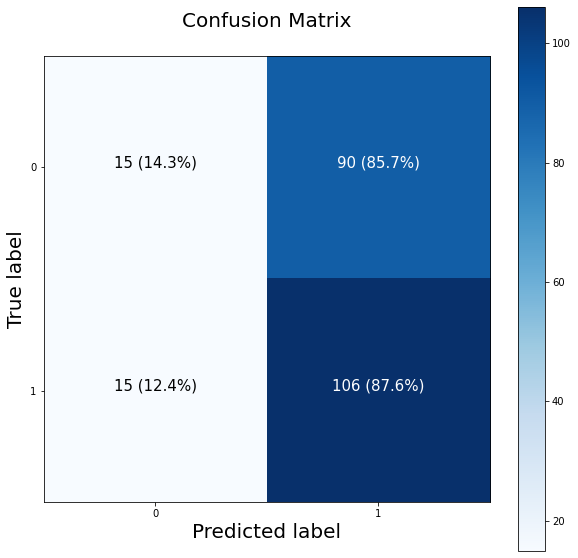

In [ ]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf

model2 = tf.keras.Sequential()

model2.add(tf.keras.Input(shape=(2,)))
model2.add(tf.keras.layers.Dense(8, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 24        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# loss function
loss_fn = tf.keras.losses.BinaryCrossentropy()

# optimizer
optimizer = tf.keras.optimizers.Adam(0.003)
model2.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'],
              )

In [ ]:
history = model2.fit(x_train_scaled,y_train,batch_size=16,
                epochs=15,
                validation_data=(x_test,y_test),
                verbose=True)

Epoch 1/15


ValueError: ignored

In [ ]:
from keras.models import Sequential
model1 = df.Sequential()
model1.df(x_train_scaled,y_train,batch_size=16, epochs=15,validation_split=0.05,verbose=0)

AttributeError: ignored

In [ ]:

# example of a multi-label classification task
from sklearn.datasets import make_multilabel_classification
# define dataset
x_train_scaled, y_train= make_multilabel_classification( n_features=10, n_classes=3, n_labels=2, random_state=42)
# summarize dataset shape
print(x_train_scaled.shape, y_train.shape)
# summarize first few examples
for i in range(10):
	print(x_train_scaled[i], y_train[i])

(100, 10) (100, 3)
[ 7.  8.  3.  9.  2.  6.  2. 12.  8.  4.] [1 1 0]
[5. 6. 8. 7. 2. 7. 2. 7. 9. 4.] [1 1 0]
[2. 7. 9. 0. 8. 8. 6. 2. 0. 0.] [0 0 1]
[4. 4. 5. 5. 4. 6. 5. 6. 8. 6.] [1 1 1]
[ 3. 14.  1.  1.  5.  5.  6. 14.  4.  3.] [0 1 0]
[8. 6. 8. 5. 5. 0. 4. 6. 4. 7.] [0 0 0]
[ 3.  3.  7.  6.  2.  8.  4. 10.  9.  6.] [1 1 0]
[4. 5. 3. 3. 6. 5. 2. 5. 6. 5.] [0 0 0]
[7. 3. 4. 1. 9. 5. 4. 2. 2. 4.] [0 0 0]
[ 5. 13.  4.  5.  4.  4.  0.  6.  7.  4.] [1 1 0]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train_scaled

array([[0.415843  , 0.42781286, 0.42816821, ..., 0.3       , 0.34615385,
        0.        ],
       [0.42558371, 0.41374858, 0.41645499, ..., 0.33333333, 0.34615385,
        0.        ],
       [0.41727546, 0.42752581, 0.41687834, ..., 0.36666667, 0.34615385,
        0.        ],
       ...,
       [0.99441346, 0.98177381, 0.98165397, ..., 0.66666667, 0.78846154,
        1.        ],
       [0.9664805 , 1.        , 0.99068589, ..., 0.7       , 0.78846154,
        1.        ],
       [1.        , 0.9668484 , 1.        , ..., 0.8       , 0.80769231,
        1.        ]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import skew

# fit whole data using random forest 
rand_forest_regressor = RandomForestClassifier(max_depth = 60, n_estimators= 1500)
rand_forest_regressor.fit(x_train_scaled, y_train)
y_rand_forest_predict = rand_forest_regressor.predict(x_test)
# fit whole data using xgb
XGB_model = XGBClassifier(learning_rate = 0.02, max_depth = 7, n_estimators = 400)
XGB_model.fit(x_train_scaled, y_train)
y_XGB_predict = XGB_model.predict(x_test)
# fit whole data using lgbm
lgb_model = lgb.LGBMClassifier(num_leaves=70, n_estimators=300, learning_rate = 0.02)
lgb_model.fit(x_train_scaled, y_train)
y_LGB_predict = lgb_model.predict(x_test)

# ensembled prediction over test data using xgb and random forest
ensembled_prediction1 = (0.5*y_XGB_predict + 0.5 *y_rand_forest_predict)

# ensembled prediction over test data using lgb and random forest
ensembled_prediction2 = (0.5*y_LGB_predict + 0.5 *y_rand_forest_predict)

ensembled_prediction1a = (0.5*y_LGB_predict + 0.5 *y_XGB_predict)

# ensembled prediction over test data lgb, xgb, and rf
ensembled_prediction3 = (0.33*y_LGB_predict + 0.33*y_XGB_predict + 0.33 *y_rand_forest_predict)

print(roc_auc_score(y_test, y_test))

1.0


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train_scaled.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(x_train_scaled, y_train, epochs = 300, batch_size = 32, validation_split=0.05,)

Epoch 1/300
36/36 [==============================] - 37s 369ms/step - loss: 95633.4766 - val_loss: 243575.5312
Epoch 2/300
36/36 [==============================] - 4s 105ms/step - loss: 92285.2422 - val_loss: 240509.3125
Epoch 3/300
36/36 [==============================] - 3s 71ms/step - loss: 90824.3281 - val_loss: 238352.4844
Epoch 4/300
36/36 [==============================] - 3s 70ms/step - loss: 89578.7812 - val_loss: 236386.9531
Epoch 5/300
36/36 [==============================] - 3s 71ms/step - loss: 88428.9453 - val_loss: 234490.5938
Epoch 6/300
36/36 [==============================] - 2s 67ms/step - loss: 87333.0859 - val_loss: 232653.9375
Epoch 7/300
36/36 [==============================] - 2s 69ms/step - loss: 86313.8516 - val_loss: 230859.8125
Epoch 8/300
36/36 [==============================] - 3s 71ms/step - loss: 85246.9609 - val_loss: 229092.5469
Epoch 9/300
36/36 [==============================] - 2s 68ms/step - loss: 84200.3672 - val_loss: 227346.0312
Epoch 10/300
36/

In [ ]:
y_predict = regressor.predict(x_test)
y_predict = y_predict.reshape(-1)
y_test = np.array(y_test).reshape(-1)
print(y_predict.shape, y_test.shape)
df_result = pd.DataFrame({'actual':y_test, 'predicted':y_predict})
df_result


(13,) (13,)


,actual,predicted
0,509.399994,302.491638
1,513.950012,302.491638
2,514.950012,302.491638
3,516.099976,302.491638
4,514.900024,302.491638
5,512.849976,302.491638
6,517.700012,302.491638
7,509.500000,302.491638
8,511.799988,302.491638
9,509.299988,302.491638


In [ ]:
df_result.plot()

NameError: ignored

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

reg = xgb.XGBRegressor()

reg.fit(x_train_scaled, y_train,
        eval_set=[(x_train_scaled, y_train)],
        early_stopping_rounds=50,
       verbose=False)

# folds = 3
# param_comb = 5
# # A parameter grid for XGBoost
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5],
#         'learning_rate':[0.02, 0.01, 0.001],
#         'estimators': [500, 1000, 2000]        
#         }

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

# random_search = RandomizedSearchCV(reg, param_distributions=params, n_iter=param_comb, scoring='neg_root_mean_squared_error', n_jobs=4, cv=skf.split(x_train_scaled,y_train), verbose=3, random_state=1001 )
# random_search.fit(x_train_scaled,y_train)

In [ ]:
# print('\n Best estimator:')
# print(random_search.best_estimator_)
# print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
# print(random_search.best_score_ * 2 - 1)
# print('\n Best hyperparameters:')
# print(random_search.best_params_)

In [ ]:
y_predict = reg.predict(x_test)
y_predict = y_predict.reshape(-1)
y_test = np.array(y_test).reshape(-1)
print(y_predict.shape, y_test.shape)
df_result = pd.DataFrame({'actual':y_test, 'predicted':y_predict})
df_result

In [ ]:
df_result.plot()

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Actual SBI Price')
plt.plot(y_predict, color = 'green', label = 'Predicted SBI Price')
plt.title('SBIN Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

NameError: ignored

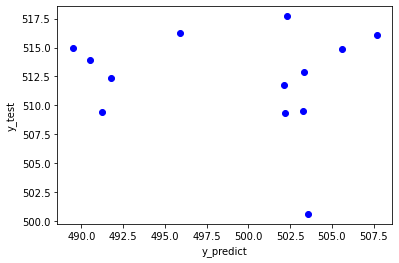

In [ ]:
plt.plot (y_predict, y_test, 'bo')
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.show()

In [ ]:
import tensorflow.compat.v2 as tf
from tensorflow.keras.layers import Convolution1D, MaxPooling1D


In [ ]:
model = tf.keras.Sequential()
model.add(Convolution1D(64, 3,padding='valid',input_shape= (100,4)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(Convolution1D(32, 3,padding='valid'))
model.add(MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(Dense(1, activation='softmax'))
model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 98, 64)            832       
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 49, 64)           0         
 g1D)                                                            
                                                                 
 lstm_14 (LSTM)              (None, 49, 100)           66000     
                                                                 
 dropout_14 (Dropout)        (None, 49, 100)           0         
                                                                 
 conv1d_23 (Conv1D)          (None, 47, 32)            9632      
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 23, 32)           0         
 g1D)                                                

In [ ]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=32, nb_epoch=150, validation_data = (X_test, y_test), verbose=2)

NameError: ignored